In [2]:
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
from patsy import dmatrices
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import math
import scipy.stats as ss
sns.set()

In [ ]:
tr_0sd = pd.read_excel("Data/ext_times_adhere_trace_nosd_365_1000.xlsx", index_col = 0)

In [ ]:
tr_0sd

Look at whether and how epidemics ended over the 365 days.

Note that epidemics that acquired 1000 or mode infections were ended as they were growing exponentially and assumed not to go extinct. 

We did also run 100 simulations of epidemics with tracing but no social distancing, cutting off epidemics at 10,000 instead of 1000 cases, but all epidemics in this simulation either never took off going extinct at Day 22, or grew to 10,000 cases by Day 50. We therefore determined that we were not prematurely cutting off epidemics that might have come under control at 1000 cases.

In [ ]:
tr_0sd['end_state'] = tr_0sd['end_reason'] 
tr_0sd['end_state']

tr_0sd.loc[tr_0sd.extinction_time == 22, ['end_state']] = 'extinct22'


In [ ]:
tr_0sd23 = tr_0sd.loc[tr_0sd['extinction_time'] != 22]
tr_0sd23                              
                              

In [ ]:
reason_tab = pd.crosstab(index=tr_0sd["end_state"],     
                      columns="count")
print(reason_tab)
reason_tab/reason_tab.sum()

In [ ]:
sns.distplot(tr_0sd["extinction_time"].loc[tr_0sd["end_reason"]!="more_than_X"], bins = range(22, 66), fit = ss.genextreme)
#plt.title("Extinction Times, tracing, lockdown)")

Now look at the distribution of extinction times among epidemics that ended but do not include those that ended on Day 22 (ie, never grew). Although, it looks like others essentially fit this descrition which died in the days soon after.

In [ ]:
sns.distplot(tr_0sd23["extinction_time"].loc[tr_0sd23["end_reason"]!="more_than_X"], bins = range(22, 66), fit = ss.genextreme)
plt.title("Extinction Times of Epidemics that went past 22 days, n=208/1000")
plt.savefig('ext_times_adhere_trace_nosd_1000_365.pdf')  

In [ ]:
ext_times_tab = pd.crosstab(index=tr_0sd["extinction_time"],     
                      columns="count")
print(ext_times_tab)

In [9]:
phase1 = pd.read_excel("Data/Extinction Times/Exit Strategy/phase1.xlsx", index_col = 0)
phase2_scenario1 = pd.read_excel("Data/Extinction Times/Exit Strategy/phase2scenario1.xlsx", index_col = 0)
phase2_scenario2 = pd.read_excel("Data/Extinction Times/Exit Strategy/phase2scenario2.xlsx", index_col = 0)
phase3 = pd.read_excel("Data/Extinction Times/Exit Strategy/phase3.xlsx", index_col = 0)
phase4 = pd.read_excel("Data/Extinction Times/Exit Strategy/phase4.xlsx", index_col = 0)

In [10]:
phase1.columns

Index(['hazard_rate_scale', 'infection_reporting_prob',
       'contact_tracing_success_prob', 'contact_trace_delay_par',
       'global_contact_reduction', 'two_step_tracing', 'prob_has_trace_app',
       'hh_prob_propensity_to_leave_isolation', 'leave_isolation_prob',
       'end_reason', 'extinction_time', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58'],
      dtype='object')

In [11]:
phase1['end_state'] = phase1['end_reason'] 
phase1['end_state']
phase1.loc[phase1.extinction_time == 22, ['end_state']] = 'extinct22'
phase1_23 = phase1.loc[phase1['extinction_time'] != 22]
reason_tab = pd.crosstab(index=phase1["end_state"],     
                      columns="count")
print(reason_tab)
reason_tab/reason_tab.sum()

col_0      count
end_state       
extinct     1921
extinct22   3079


col_0,count
end_state,
extinct,0.3842
extinct22,0.6158


Text(18.875, 0.5, 'Density')

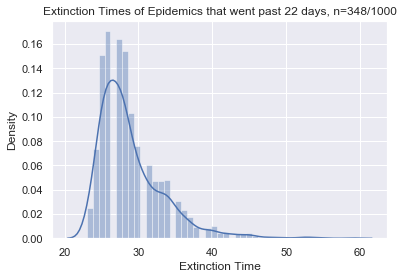

In [12]:
sns.distplot(phase1_23["extinction_time"])
plt.title("Extinction Times of Epidemics that went past 22 days, n=348/1000")
plt.xlabel("Extinction Time")
plt.savefig('Figures\Extinction Times\Exit Strategy\phase1.svg')
plt.ylabel("Density")

In [13]:
phase2_scenario1['end_state'] = phase2_scenario1['end_reason'] 
phase2_scenario1.loc[phase2_scenario1.extinction_time == 22, ['end_state']] = 'extinct22'
phase2_scenario1_23 = phase2_scenario1.loc[phase2_scenario1['extinction_time'] != 22]
reason_tab_p2s1 = pd.crosstab(index=phase2_scenario1["end_state"],     
                      columns="count")
print(reason_tab_p2s1)
reason_tab_p2s1/reason_tab_p2s1.sum()

col_0      count
end_state       
extinct      419
extinct22    581


col_0,count
end_state,
extinct,0.419
extinct22,0.581


Text(18.875, 0.5, 'Density')

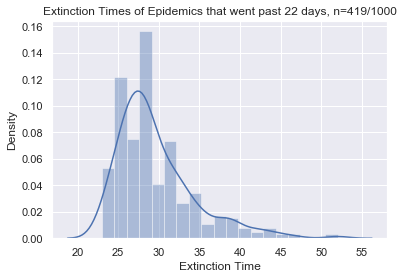

In [14]:
sns.distplot(phase2_scenario1_23["extinction_time"])
plt.title("Extinction Times of Epidemics that went past 22 days, n=419/1000")
plt.xlabel("Extinction Time")
plt.savefig('Figures\Extinction Times\Exit Strategy\phase2scenario1.svg')
plt.ylabel("Density")

In [15]:
phase2_scenario2['end_state'] = phase2_scenario2['end_reason'] 
phase2_scenario2.loc[phase2_scenario2.extinction_time == 22, ['end_state']] = 'extinct22'
phase2_scenario2_23 = phase2_scenario2.loc[phase2_scenario2['extinction_time'] != 22]
reason_tab_p2s2 = pd.crosstab(index=phase2_scenario2["end_state"],     
                      columns="count")
print(reason_tab_p2s2)
reason_tab_p2s2/reason_tab_p2s2.sum()

col_0      count
end_state       
extinct      450
extinct22    550


col_0,count
end_state,
extinct,0.45
extinct22,0.55


Text(18.875, 0.5, 'Density')

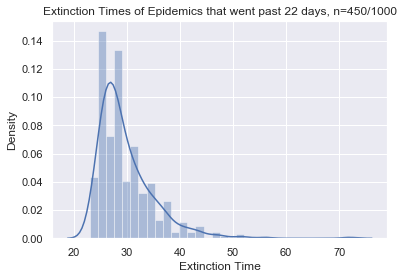

In [16]:
sns.distplot(phase2_scenario2_23["extinction_time"])
plt.title("Extinction Times of Epidemics that went past 22 days, n=450/1000")
plt.xlabel("Extinction Time")
plt.savefig('Figures\Extinction Times\Exit Strategy\phase2scenario2.svg')
plt.ylabel("Density")

In [17]:
phase3['end_state'] = phase3['end_reason'] 
phase3.loc[phase3.extinction_time == 22, ['end_state']] = 'extinct22'
phase3_23 = phase3.loc[phase3['extinction_time'] != 22]
reason_tab_p3 = pd.crosstab(index=phase3["end_state"],     
                      columns="count")
print(reason_tab_p3)
reason_tab_p3/reason_tab_p3.sum()

col_0      count
end_state       
extinct      476
extinct22    524


col_0,count
end_state,
extinct,0.476
extinct22,0.524


Text(18.875, 0.5, 'Density')

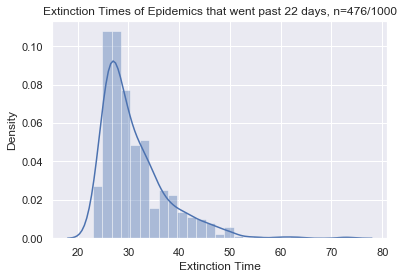

In [18]:
sns.distplot(phase3_23["extinction_time"])
plt.title("Extinction Times of Epidemics that went past 22 days, n=476/1000")
plt.xlabel("Extinction Time")
plt.savefig('Figures\Extinction Times\Exit Strategy\phase3.svg')
plt.ylabel("Density")

In [19]:
phase4['end_state'] = phase4['end_reason'] 
phase4.loc[phase4.extinction_time == 22, ['end_state']] = 'extinct22'
phase4_23 = phase4.loc[phase4['extinction_time'] != 22]
reason_tab_p4 = pd.crosstab(index=phase4["end_state"],     
                      columns="count")
print(reason_tab_p4)
reason_tab_p4/reason_tab_p4.sum()

col_0      count
end_state       
extinct     2935
extinct22   2065


col_0,count
end_state,
extinct,0.587
extinct22,0.413


Text(18.875, 0.5, 'Density')

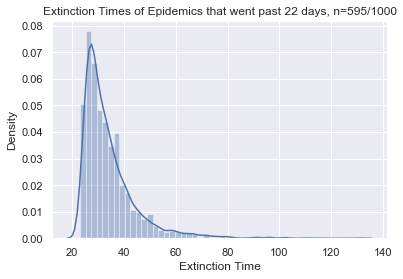

In [20]:
sns.distplot(phase4_23["extinction_time"])
plt.title("Extinction Times of Epidemics that went past 22 days, n=595/1000")
plt.xlabel("Extinction Time")
plt.savefig('Figures\Extinction Times\Exit Strategy\phase.svg')
plt.ylabel("Density")

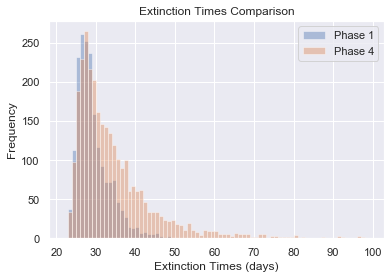

In [21]:
sns.distplot(phase1_23["extinction_time"], kde = False, bins = range(22, 50))
#sns.distplot(phase2_scenario1_23["extinction_time"], kde = False, bins = range(22, 50))
#sns.distplot(phase2_scenario2_23["extinction_time"], kde = False, bins = range(22, 50))
#sns.distplot(phase3_23["extinction_time"], kde = False, bins = range(22, 50))
sns.distplot(phase4_23["extinction_time"], kde = False, bins = range(22, 100))
plt.legend(("Phase 1",
            #"Phase 2 Scenario 1", "Phase 2 Scenario 2", "Phase 3",
            "Phase 4"))
plt.xlabel("Extinction Times (days)")
plt.ylabel("Frequency")
plt.title("Extinction Times Comparison")
plt.savefig("Figures/Extinction Times/Exit Strategy/Comparison.svg")